<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Computer-Vision/blob/main/2348505_CV_LAB_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implementing Linear Spatial Filtering using Built-in and user defined functions**

Spatial Filtering technique is used directly on pixels of an image. Mask is usually considered to be added in size so that it has specific center pixel. This mask is moved on the image such that the center of the mask traverses all image pixels.

**Importing Necessary Libraries**

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import random

**1. User-Defined**

In [ ]:
# Custom Defining a Linear Spatial Filter Function

def linear_spatial_filter(image,kernel):
  iheight,iwidth = image.shape
  kheight,kwidth = kernel.shape
  ah = kheight//2
  aw = kwidth//2
  padim = np.pad(image,((ah,ah),(aw,aw)),mode='constant')
  outim = np.zeros_like(image)
  for i in range(iheight):
    for j in range(iwidth):
      outim[i,j] = np.sum(padim[i:i+kheight,j:j+kwidth]*kernel)
  return outim.astype(np.uint8)

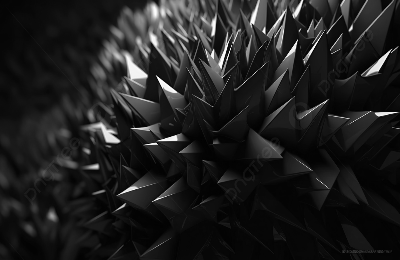

In [ ]:
# Original Image

image = cv2.resize(cv2.imread("img11.jpg",cv2.IMREAD_GRAYSCALE),(400,260))
cv2_imshow(image)

**Introducing Noise to Image**

---



In [ ]:
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

image = cv2.imread('download.jpeg',0) # Only for grayscale image
noise_img = sp_noise(image,0.05)
cv2.imwrite('sp_noise.jpg', noise_img)

True

**Gaussian Blur Filter**

---
Smoothing, noise reduction or blurring filter (focal weighted mean)

Kernel:

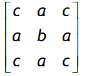


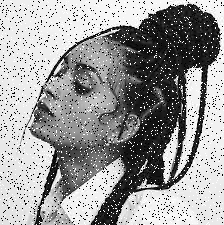

In [ ]:
cv2_imshow(noise_img)

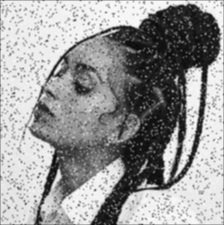

In [ ]:
kernel = 1/16*np.array([[1,2,1],
                         [2,4,2],
                          [1,2,1]])
fil_image = linear_spatial_filter(image,kernel)
cv2_imshow(fil_image)

**Laplacian Filter**

---

Mean effect removal/sharpening filter (focal sum). Provides limited edge detection. Typically entries sum to 1 but may be greater. 3x3 Laplacian kernels typical add to 1. Larger Laplacian kernels (e.g. 7x7) may be more complex and sum to >1

Kernel:

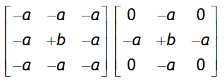

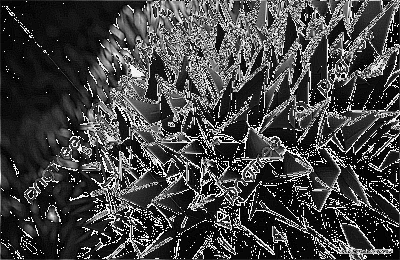

In [ ]:
kernel = np.array([[-1,-1,-1],
                   [-1,9,-1],
                   [-1,-1,-1]])
fil_image = linear_spatial_filter(image,kernel)
cv2_imshow(fil_image)

**Mean Filter**


---
Smoothing, noise reduction or blurring filter (focal mean)

Kernel:

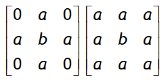

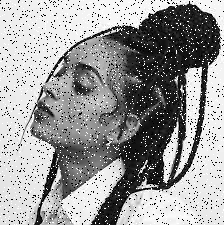

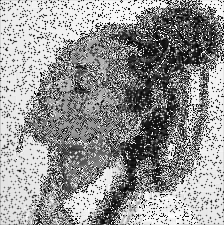

In [ ]:
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# Apply the linear spatial filter
filtered_image = linear_spatial_filter(noise_img, kernel)

# Display the original and filtered images
cv2_imshow( noise_img)
cv2_imshow( filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

The size of the kernel might not be suitable for the level of noise present in the image. Smaller kernels might not effectively remove noise, while larger kernels might blur the image excessively.



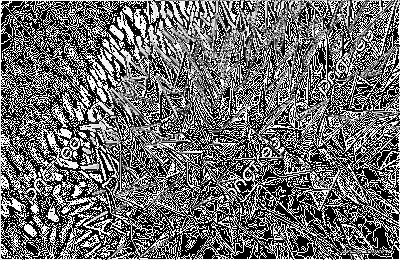

In [ ]:
kernel = np.array([[0,1,0],
                   [1,-4,1],
                   [0,1,0]])
fil_image = linear_spatial_filter(image,kernel)
cv2_imshow(fil_image)

**USING BUILT-IN FUNCTIONS**

**Gaussian Filter**

array([[ 4,  5,  5, ..., 30, 41, 47],
       [ 5,  5,  5, ..., 32, 42, 47],
       [ 5,  5,  5, ..., 35, 43, 45],
       ...,
       [18, 18, 18, ...,  4,  4,  4],
       [19, 18, 18, ...,  4,  4,  4],
       [19, 19, 18, ...,  4,  4,  5]], dtype=uint8)
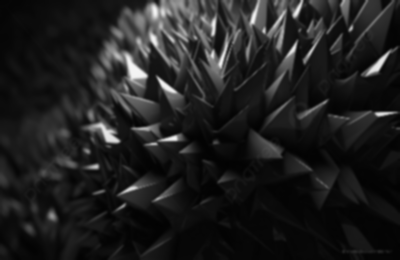

In [ ]:
cv2.GaussianBlur(image,(5,5),0)

**Laplacian Filter**

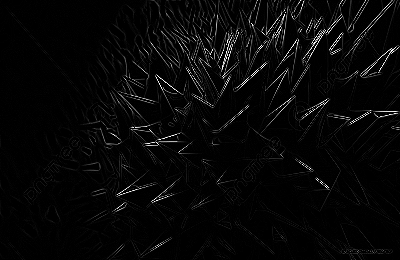

In [ ]:
cv2_imshow(cv2.Laplacian(image,cv2.CV_64F))

**Mean Filter**

array([[ 5,  5,  5, ..., 36, 38, 42],
       [ 5,  5,  5, ..., 35, 38, 42],
       [ 5,  5,  5, ..., 34, 38, 42],
       ...,
       [19, 19, 19, ...,  4,  4,  4],
       [18, 18, 18, ...,  4,  4,  4],
       [18, 18, 18, ...,  4,  4,  4]], dtype=uint8)
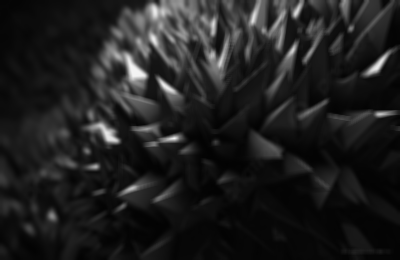

In [ ]:
cv2.blur(image,(5,5))